In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.array([1,2,3])
b = np.array([10,20,30])
a*b+a

array([11, 42, 93])

<IPython.core.display.Javascript object>


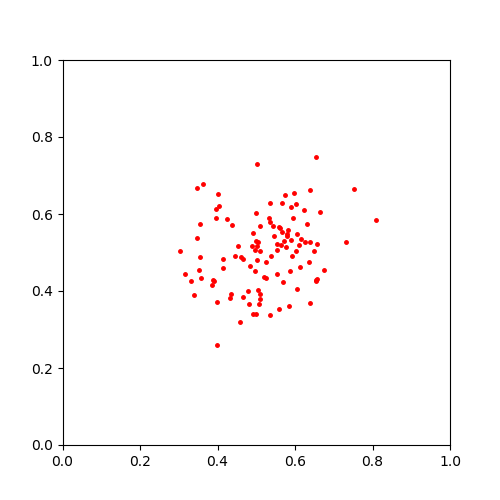

In [3]:
%matplotlib notebook

nanimals = 111
nsteps = 100
speed = 0.01

x = np.ones(nanimals)*0.5
y = np.ones(nanimals)*0.5

fig = plt.figure(figsize=(5,5))
plt.xlim((0,1));
plt.ylim((0,1));
    
for t in range (nsteps):
    x += np.random.randn(nanimals)*speed
    y += np.random.randn(nanimals)*speed
    for i in range(nanimals): 
        if x[i]<0: x[i]=0
        if y[i]<0: y[i]=0
        if x[i]>1: x[i]=1
        if y[i]>1: y[i]=1
        
    plt.cla()
    plt.plot(x,y,"r.",markersize=5);
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw()

## Better ways to limit values in a numpy vector 

The power of numpy is that if we can write a one-liner, it will be really fast. So we should try to voids for loops, if possible.

For a playground situation, let's create a numpy array with only one negative element, and then let's find a way to set this element to 0. So like, limiting from below in our geese-meese simulation.

In [4]:
# Playground for changing stuff in a vector
a = np.array ([1,2,3,-7,4]) #Our task, limit this -7, making it a 0

#Option #1 slow, loop:
a = np.array ([1,2,3,-7,4])
for i in range(len(a)):
    if a[i]<0: a[i]=0
    print(a)
#Option #2 fast, numpy conditions:
a = np.array ([1,2,3,-7,4])
print('a<0:',a<0)
print('a[a<0]:', a[a<0])
a[a<0]=0
print(a)

#Option #3 fats, vectorized formula:
a = np.array([1,2,3,-7,4])
np.maximum(a,0)  #npmax shows you the highest element, npmaximum applies the max to each element
print(a)


[ 1  2  3 -7  4]
[ 1  2  3 -7  4]
[ 1  2  3 -7  4]
[1 2 3 0 4]
[1 2 3 0 4]
a<0: [False False False  True False]
a[a<0]: [-7]
[1 2 3 0 4]
[ 1  2  3 -7  4]


# Homework
1. Finish this without a loop

2. Make a dedicated moose that moves in a straight line, make it dt??? Make it that they can't exit the borders

3. Once a moose reaches the border it should go back in the opposite direction


In [5]:
np.random.randint(size=20, low=0, high=2) # So the high is the max value plus one

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0])

<IPython.core.display.Javascript object>


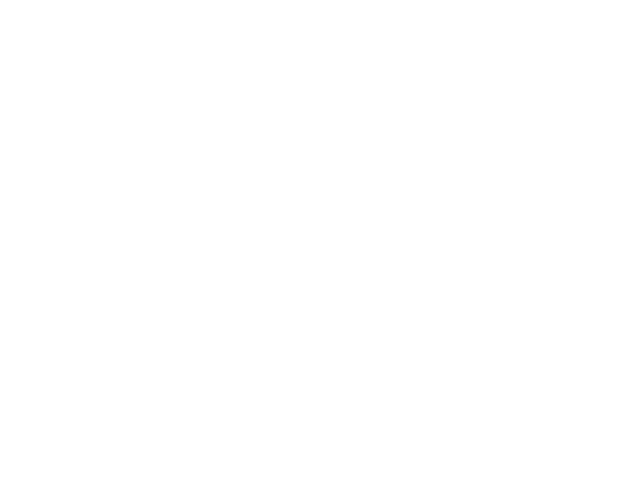

In [6]:
%matplotlib notebook

nanimals = 111
nsteps = 100
vmin = 0.01
vmax=0.05


x = np.ones(nanimals)*0.5
y = np.ones(nanimals)*0.5
vx = np.random.uniform(size=nanimals, low=vmin, high=vmax)*(2*np.random.randint(size=nanimals, low=0, high=2)-1)
vy = np.random.uniform(size=nanimals, low=vmin, high=vmax)*(2*np.random.randint(size=nanimals, low=0, high=2)-1)

#fig = plt.figure(figsize=(3,3))
#ax = plt.subplot(111)
#plt.xlim((0,1));
#plt.ylim((0,1));
#fig.show()
#fig.canvas.draw()

plt.hist(vx,bins=20);


<IPython.core.display.Javascript object>


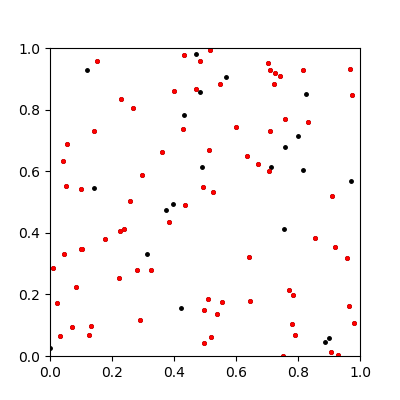

<IPython.core.display.Javascript object>


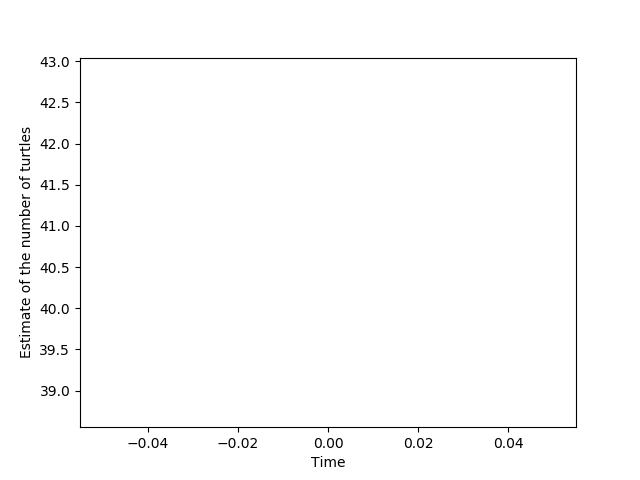

Text(0, 0.5, 'Estimate of the number of turtles')

In [11]:
%matplotlib notebook

nanimals = 100
nsteps = 1000

vmin = 0.01
vmax=0.05

x = np.random.uniform(size=nanimals)
y = np.random.uniform(size=nanimals)
vx = np.random.uniform(size=nanimals, low=vmin, high=vmax)*(2*np.random.randint(size=nanimals, low=0, high=2)-1)
vy = np.random.uniform(size=nanimals, low=vmin, high=vmax)*(2*np.random.randint(size=nanimals, low=0, high=2)-1)

trapsize = 0.4
color = np.where(np.logical_and(x<trapsize,y<trapsize),1,0)
marked = np.sum(color)
estimation = np.zeros(nsteps)


fig = plt.figure(figsize=(4,4))

for t in range (nsteps):
    x += vx
    y += vy
   
    # Boundaries and reflecting:
    vx= np.where(np.logical_or(x>1,x<0),-vx,vx)
    vy= np.where(np.logical_or(y>1,y<0),-vy,vy)
    
    #Recapture:
    recap = np.sum(np.logical_and(x<trapsize,y<trapsize)*color)
    recap_marked = np.sum(np.logical_and(x<trapsize,y<trapsize))
    estimation[t] = (marked+1)/(recap_marked+1)*(recap_marked*recap)-1       

    
    #for i in range(nanimals): 
        #if x[i]<0: x[i]=0
        #if y[i]<0: y[i]=0
        #if x[i]>1: x[i]=1
        #if y[i]>1: y[i]=1
  
    # Figures:
    plt.cla()
    plt.plot(x,y,'k.',markersize=5);
    plt.plot(x[color==0],y[color==0],'r.',markersize=5)
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw()
    
plt.figure()
plt.plot(estimation[t])
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')